# **[HW6] Practice_4**

1. Install packages
2. Gram-Schmidt orthonormalization
3. QR decomposition

선형대수 실습은, exercise 혹은 coding 문제풀이에 집중하기 보다는, 수업시간에 배웠던 개념들을 visualize 하면서 이를 폭넓게 이해하는 데에 초점을 맞추고 있습니다. 실습에서 사용한 예시 외에도, 다양한 matrix들을 visualize 하면서 개념을 익혀보시기 바랍니다.

# 1. Install packages

> 필요한 package를 설치하고 import합니다

In [1]:
# visualization을 위한 helper code입니다.
from urllib.request import urlretrieve
URL = 'https://go.gwu.edu/engcomp4plot'
urlretrieve(URL, 'plot_helper.py')

import sys
sys.path.append('../scripts/')

# 다음 세 custom function (1)plot_vector, (2)plot_linear_transformation, (3) plot_linear_transformations
# 을 사용할 것입니다.
from plot_helper import *

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import scipy.linalg
import sympy as sy

sy.init_printing() 
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

# 2. Gram-Schmidt orthonormalization

> Gram-Schmidt orthonormalization은, 주어진 basis를 orthonormal basis로 만들기 위한 method입니다. $\{x_1, x_2, x_3\}$을 $R^3$의 basis라고 합시다.

$$
x_1 = \begin{bmatrix} 3\\6\\2\end{bmatrix}, x_2 = \begin{bmatrix} 1\\2\\4\end{bmatrix}, x_3 = \begin{bmatrix} 2\\-2\\1\end{bmatrix}
$$

> $x_1, x_2, x_3$은 서로 orthogonal이 아닙니다 ($x_1 \cdot x_2 = 32 \neq 0$). Gram-Schmidt orthonormalization을 이용해서 이를 orthonormal basis $u_1, u_2, u_3$으로 바꿔보겠습니다. 이때 $u_1, u_2, u_3$는 최종적으로 다음을 만족해야 합니다.


1.  span $\{x_1, x_2, x_3\}$ = span $\{u_1, u_2, u_3\}$
2.  $u_i \perp u_j$ for $i,j \in \{1,2,3\}$ (i.e., $u_i \cdot u_j = 0 $)


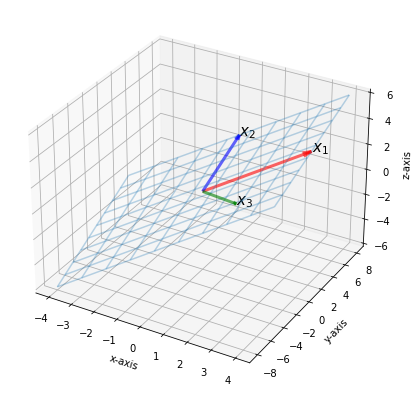

In [37]:
s = np.linspace(-1, 1, 10)
t = np.linspace(-1, 1, 10)
S, T = np.meshgrid(s, t)

vec = np.array([[[0,0,0,3, 6, 2]],
             [[0,0,0,1, 2, 4]],
             [[0,0,0,2, -2, 1]]])

# x1과 x_2의 linear combination, 즉 span
X = vec[0,:,3] * S + vec[1,:,3] * T
Y = vec[0,:,4] * S + vec[1,:,4] * T
Z = vec[0,:,5] * S + vec[1,:,5] * T

fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(projection='3d')

# x1, x2가 span하는 공간을 격자로 나타냅니다. 
ax.plot_wireframe(X, Y, Z, linewidth = 1.5, alpha = .3)

############################# x1 and x2 ##############################
colors = ['r','b','g']
s = ['$x_1$', '$x_2$', '$x_3$']
for i in range(vec.shape[0]):
    X,Y,Z,U,V,W = zip(*vec[i,:,:])
    ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False,
              color = colors[i], alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
              linestyles = 'solid',linewidths = 3)
    ax.text(vec[i,:,3][0], vec[i,:,4][0], vec[i,:,5][0], s = s[i], size = 15)

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

> 위의 파란색 격자는 $x_1, x_2$가 span하는 2-dimensional subspace입니다. Gram-Schmidt를 위해, 우선 셋 중 하나의 vector를 고정하고 시작하겠습니다.

$$v_1 = x_1 \\ u_1 = \frac{v_1}{||v_1||}$$

> span $\{v_1\}$을 $\mathcal{W_1}$이라고 합시다. 이제 $v_2$를 구하기 위해, $x_2$를 $\mathcal{W_1}$에 orthogonal projection 한 vector를 먼저 구하도록 하겠습니다. 

$$ \hat{x_2} = \text{Proj}_{\mathcal{W_1}}x_2 = \frac{x_2 \cdot u_1}{u_1 \cdot u_1}u_1 \\
v_2 = x_2 - \hat{x_2} = x_2 -  \frac{x_2 \cdot u_1}{u_1 \cdot u_1}u_1 \\
u_2 = \frac{v_2}{||v_2||}
$$

### Exercise

In [38]:
x1 = np.array([3, 6, 2])
x2 = np.array([1, 2, 4])
x3 = np.array([2, -2, 1])

v1 = x1
v1_norm = np.linalg.norm(v1)
u1 = v1 / v1_norm
x2_hat = (x2@u1)/(u1@u1)*u1
v2 = x2 - x2_hat
v2_norm = np.linalg.norm(v2)
u2 = v2 / v2_norm

print(u1 @ u2)
print(x2_hat @ u2)

0.0
1.1102230246251565e-16


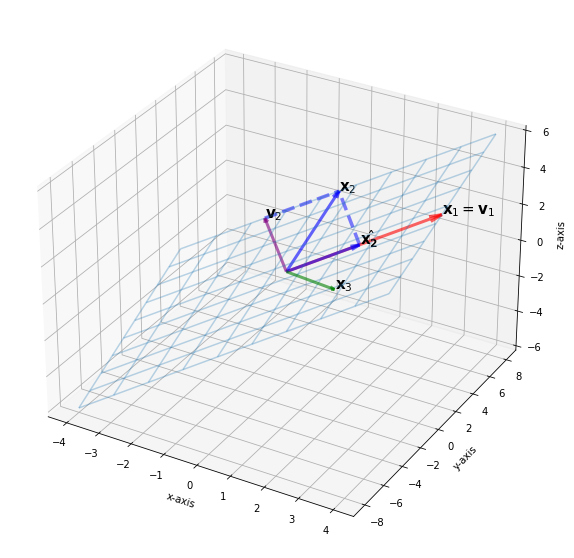

In [39]:
s = np.linspace(-1, 1, 10)
t = np.linspace(-1, 1, 10)
S, T = np.meshgrid(s, t)

# x1과 x_2의 linear combination, 즉 span
X = x1[0] * S + x2[0] * T
Y = x1[1] * S + x2[1] * T
Z = x1[2] * S + x2[2] * T

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection='3d')

# x1, x2가 span하는 공간을 격자로 나타냅니다. 
ax.plot_wireframe(X, Y, Z, linewidth = 1.5, alpha = .3)

############################# x1, x2, x3, x2_hat, v2 ##############################

vec = np.array([[0, 0, 0, x1[0], x1[1], x1[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, x2[0], x2[1], x2[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'blue', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, x3[0], x3[1], x3[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'green', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, x2_hat[0],x2_hat[1], x2_hat[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'blue', alpha = .6,arrow_length_ratio = .12, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, v2[0], v2[1], v2[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'purple', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)



ax.text(x1[0], x1[1], x1[2], '$\mathbf{x}_1 = \mathbf{v}_1 $', size = 15)
ax.text(x2[0], x2[1], x2[2], '$\mathbf{x}_2$', size = 15)
ax.text(x3[0], x3[1], x3[2], '$\mathbf{x}_3$', size = 15)
ax.text(x2_hat[0], x2_hat[1], x2_hat[2], '$\hat{\mathbf{x_2}}$', size = 15)
ax.text(v2[0], v2[1], v2[2], '$\mathbf{v}_2$', size = 15)

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

################################# Dashed Line ##################################

point1 = [x2_hat[0], x2_hat[1], x2_hat[2]]
point2 = [x2[0], x2[1], x2[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

point1 = [v2[0], v2[1], v2[2]]
point2 = [x2[0], x2[1], x2[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 3.5,alpha =0.5, ls = '--')
plt.show()

> $u_1, u_2$를 구했으므로, 이제 세 번째 basis인 $v_3$만 찾으면 됩니다. span $\{v_1, u_2\}$을 $\mathcal{W_2}$이라고 합시다. 이제 $v_3$를 구하기 위해, $x_3$를 $\mathcal{W_2}$에 orthogonal projection 한 vector를 먼저 구하도록 하겠습니다. 

$$ \hat{x_3} = \text{Proj}_{\mathcal{W_2}}x_3 = \frac{x_3 \cdot u_1}{u_1 \cdot u_1}u_1  + \frac{x_3 \cdot u_2}{u_2 \cdot u_2}u_2 \\
v_3 = x_3 - \hat{x_3} = x_3 -  \frac{x_3 \cdot u_1}{u_1 \cdot u_1}u_1  - \frac{x_3 \cdot u_2}{u_2 \cdot u_2}u_2 \\
u_3 = \frac{v_3}{||v_3||}
$$

### Exercise

In [41]:
x3_hat = (x3@u1)/(u1@u1)*u1 + (x3@u2)/(u2@u2)*u2 
v3 = x3 - x3_hat
u3 = v3 / np.linalg.norm(v3)

print(u1 @ u3)
print(u2 @ u3)
print(x3_hat @ u3)

0.0
0.0
0.0


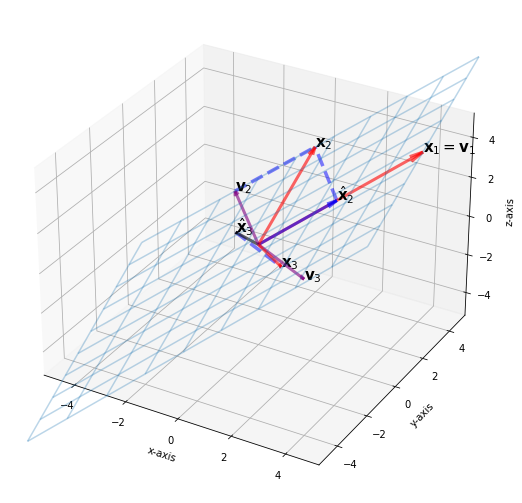

In [42]:
s = np.linspace(-1, 1, 10)
t = np.linspace(-1, 1, 10)
S, T = np.meshgrid(s, t)

# x1과 x_2의 linear combination, 즉 span
X = x1[0] * S + x2[0] * T
Y = x1[1] * S + x2[1] * T
Z = x1[2] * S + x2[2] * T

fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(projection='3d')
# x1, x2가 span하는 공간을 격자로 나타냅니다. 
ax.plot_wireframe(X, Y, Z, linewidth = 1.5, alpha = .3)

############################# x1, x2, x2_hat, v2, x3, x3_hat, v3 ##############################

vec = np.array([[0, 0, 0, x1[0], x1[1], x1[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, x2[0], x2[1], x2[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, x2_hat[0],x2_hat[1], x2_hat[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'blue', alpha = .6,arrow_length_ratio = .12, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, v2[0], v2[1], v2[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'purple', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, x3[0], x3[1], x3[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)


vec = np.array([[0, 0, 0, x3_hat[0], x3_hat[1], x3_hat[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'black', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)


vec = np.array([[0, 0, 0, v3[0], v3[1], v3[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'purple', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)


ax.text(x1[0], x1[1], x1[2], '$\mathbf{x}_1 = \mathbf{v}_1 $', size = 15)
ax.text(x2[0], x2[1], x2[2], '$\mathbf{x}_2$', size = 15)
ax.text(x2_hat[0], x2_hat[1], x2_hat[2], '$\hat{\mathbf{x}}_2$', size = 15)
ax.text(v2[0], v2[1], v2[2], '$\mathbf{v}_2$', size = 15)
ax.text(x3[0], x3[1], x3[2], '$\mathbf{x}_3$', size = 15)
ax.text(x3_hat[0], x3_hat[1], x3_hat[2], '$\hat{\mathbf{x}}_3$', size = 15)
ax.text(v3[0], v3[1], v3[2], '$\mathbf{v}_3$', size = 15)

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

################################# Dashed Line ##################################


point1 = [x2_hat[0], x2_hat[1], x2_hat[2]]
point2 = [x2[0], x2[1], x2[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

point1 = [v2[0], v2[1], v2[2]]
point2 = [x2[0], x2[1], x2[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 3.5,alpha =0.5, ls = '--')


point1 = [x3_hat[0], x3_hat[1], x3_hat[2]]
point2 = [x3[0], x3[1], x3[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 3.5,alpha =0.5, ls = '--')


################################ Axes ######################################
ax.set_xlim3d(-5, 5)
ax.set_ylim3d(-5, 5)
ax.set_zlim3d(-5, 5)
plt.show()

> 이제 우리는 orthonormal basis $\{u_1, u_2, u_3\}$을 구했습니다. 즉, 처음에 얘기했던 조건인 $u_i \cdot u_j = 0$이 만족된 것입니다. 그럼 첫 번째 조건, span $\{x_1, x_2, x_3\}$ = span $\{u_1, u_2, u_3\}$은 만족됐을까요?

> 결론부터 얘기하면, 만족하게 됩니다. Gram-Schmidt로 유도된 식을 보면,

1. $u_1$은 $x_1$의 linear combination ($u_1 = x_1$)
2. $u_2$은 $x_1, x_2$의 linear combination
3. $u_3$은 $x_1, x_2, x_3$의 linear combination 

> 의 형태임을 알 수 있습니다. Span하는 subspace가 같다는 말은, 세 vector의 linear combination으로 만들 수 있는 vector가 같다는 말입니다. 따라서 $x_1, x_2, x_3$으로 만들 수 있는 vector를 $u_1, u_2, u_3$가 만들 수 있고, $u_1, u_2, u_3$으로 만들 수 있는 vector를 $x_1, x_2, x_3$가 만들 수 있다면 span $\{x_1, x_2, x_3\}$ = span $\{u_1, u_2, u_3\}$은 만족됩니다.

> 예를 들어보겠습니다. Linearly independent한 $x_1,x_2,x_3$에 대해 Span $\{x_1, x_2, x_3\}$과 span$\{x_1, x_2, 2x_2 + x_3\}$이 있다고 합시다. 이때 $\{x_1, x_2, x_3\}$의 linear combination $k = \alpha_1 x_1 + \alpha_2 x_2 + \alpha_3 x_3 $인 vector k가 있다고 하면, 이는 $ \alpha_1 x_1 + (\alpha_2-2\alpha_3) x_2 + \alpha_3 (2x_2 + x_3) $와 같습니다. 즉 k는 $\{x_1, x_2, 2x_2 + x_3\}$의 linear combination으로 만들 수 있는 것입니다. 이 과정을 반대로 하면, $\{x_1, x_2, 2x_2 + x_3\}$으로 만들 수 있는 vector는 $\{x_1, x_2, x_3\}$으로 만들 수 있음을 알 수 있습니다.

> 이를 일반화 하면, span $\{x_1,x_2,x_3\}$은 span $\{x_1 $+ linear combination of $(x_2,x_3)$, $x_2$ + linear combination of $(x_1, x_3)$, $x_3$ + linear combination of $(x_1,x_2)\}$ 와 같음을 알 수 있습니다. $u_1, u_2, u_3$은 이를 만족하므로, 첫 번째 조건을 만족하게 됩니다.

> 세 vector $u_1, u_2, u_3$을 각 column으로 하는 matrix $U$는 orthogonal matrix가 됩니다.

In [43]:
U = np.vstack((u1,u2,u3)).T
U.T@U

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [44]:
U@U.T  # UU^T는 identity matrix가 됩니다.

array([[ 1., -0., -0.],
       [-0.,  1., -0.],
       [-0., -0.,  1.]])

# 3. QR decomposition

Gram-Schmidt를 하면 자연스럽게 matrix $A$의 QR decomposition을 수행할 수 있습니다.


### Exercise

위의 예시를 가져옵시다.

* Matrix $A = \begin{bmatrix} 3&1&2\\6&2&-2\\2&4&1\end{bmatrix}$라고 할 때, 위의 Gram-Schmidt된 결과를 이용해서 A를 QR decompose 하시오 (hint: 아래 수식을 이용하시오).

$$ 
u_1 = \frac{v_1}{||v_1||} \rightarrow x_1 = ||v_1|| \; u_1
\\
u_2 = \frac{v_2}{||v_2||} = \frac{x_2 -  \frac{x_2 \cdot u_1}{u_1 \cdot u_1}u_1}{||v_2||} \rightarrow x_2 = \frac{x_2 \cdot u_1}{u_1 \cdot u_1}u_1 + ||v_2|| \; u_2
\\
u_3 = \frac{v_3}{||v_3||} =  \frac{x_3 -  \frac{x_3 \cdot u_1}{u_1 \cdot u_1}u_1  - \frac{x_3 \cdot u_2}{u_2 \cdot u_2}u_2 }{||v_3||} \rightarrow x_3 = \frac{x_3 \cdot u_1}{u_1 \cdot u_1}u_1 + \frac{x_3 \cdot u_2}{u_2 \cdot u_2}u_2 + ||v_3|| \; u_3  \\
$$

In [51]:
A = np.array([[3,1,2],[6,2,-2],[2,4,1]])
Q = np.array([u1, u2, u3]).T
r1 = np.array([v1_norm, 0, 0])
r2 = np.array([(x2@u1)/(u1@u1), v2_norm, 0])
r3 = np.array([(x3@u1)/(u1@u1), (x3@u2)/(u2@u2), np.linalg.norm(v3)])
R = np.array([r1, r2, r3]).T

print(Q,R,sep='\n')

[[ 0.429 -0.128  0.894]
 [ 0.857 -0.256 -0.447]
 [ 0.286  0.958  0.   ]]
[[ 7.     3.286 -0.571]
 [ 0.     3.194  1.214]
 [ 0.     0.     2.683]]


> Numpy의 함수를 이용하면, 이를 자동으로 구할 수 있습니다.

In [52]:
Q,R = np.linalg.qr(A)

In [53]:
Q

array([[-0.429, -0.128, -0.894],
       [-0.857, -0.256,  0.447],
       [-0.286,  0.958, -0.   ]])

In [54]:
R

array([[-7.   , -3.286,  0.571],
       [ 0.   ,  3.194,  1.214],
       [ 0.   ,  0.   , -2.683]])